# Setup Environment

Assuming starter code has same V1 shortfalls as for Module 2.

In [1]:
# import matplotlib.pyplot as plt
# from __future__ import absolute_import, division, print_function, unicode_literals
# import pathlib
# import pandas as pd
# import seaborn as sns
# import numpy as np
# import tensorflow.compat.v1 as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# tf.disable_v2_behavior()
# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling

Original Code is Tensorflow V 2.0.0, so it may work without forcing V1 behavior.

In [2]:
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2024-09-28 21:03:15.775492: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-28 21:03:16.674752: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-09-28 21:03:16.674825: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-09-28 21:03:16.674829: W tensorfl

In [3]:
print(tf.__version__)

2.11.1


# Import Data

Code below has some error in the import function get_file that I don't understand. Using the following block instead. https://www.tensorflow.org/tutorials/keras/regression

In [4]:
# dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", cache_subdir = 'my_data')
# dataset_path
# column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
# raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values = "?", comment = '\t', sep = " ", skipinitialspace = True)
# dataset = raw_dataset.copy()
# dataset.tail()

In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# Prep Data

In [6]:
dataset = dataset.dropna()
# dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
# dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


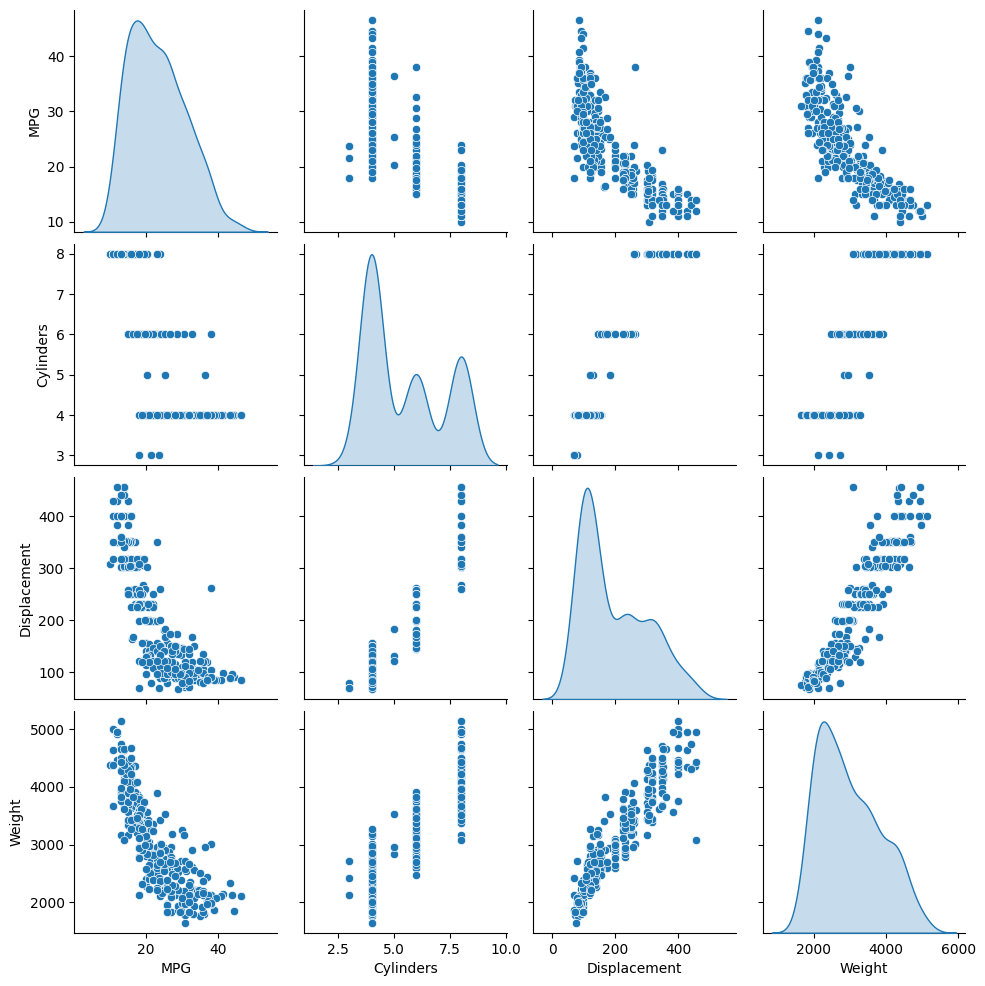

In [7]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde");

In [8]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()

In [9]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')  

# Review Statistics

In [10]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


In [11]:
train_stats.tail()

,count,mean,std,min,25%,50%,75%,max
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.0,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.0,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.2,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.0,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.0,3.0


# Build Model

In [12]:
def build_model():
    model = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'), layers.Dense(1)])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model    

In [13]:
model = build_model()

2024-09-28 21:03:20.756762: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-09-28 21:03:20.756789: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-09-28 21:03:20.756806: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-e4308444-ee4b-40c4-b1c5-a2dd284b3779): /proc/driver/nvidia/version does not exist
2024-09-28 21:03:20.757022: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropria

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [15]:
untrained_sample = train_dataset.sample(10)

In [16]:
model.predict(untrained_sample)

1/1 [==============================] - 0s 83ms/step


array([[-298.22937],
       [-336.43164],
       [-336.9438 ],
       [-373.2157 ],
       [-332.04144],
       [-402.9248 ],
       [-429.82416],
       [-527.9217 ],
       [-461.13535],
       [-542.9393 ]], dtype=float32)

# Train Model

In [17]:
EPOCHS = 1000
history = model.fit(normed_train_data, train_labels, epochs = EPOCHS, validation_split = 0.2, verbose = 0, callbacks = [tfdocs.modeling.EpochDots()]) 


Epoch: 0, loss:589.1881,  mae:23.0451,  mse:589.1881,  val_loss:591.2402,  val_mae:23.0561,  val_mse:591.2402,  
....................................................................................................
Epoch: 100, loss:6.3208,  mae:1.7386,  mse:6.3208,  val_loss:9.1970,  val_mae:2.3352,  val_mse:9.1970,  
....................................................................................................
Epoch: 200, loss:5.2318,  mae:1.5579,  mse:5.2318,  val_loss:9.0061,  val_mae:2.2976,  val_mse:9.0061,  
....................................................................................................
Epoch: 300, loss:4.9936,  mae:1.5112,  mse:4.9936,  val_loss:8.9321,  val_mae:2.3170,  val_mse:8.9321,  
....................................................................................................
Epoch: 400, loss:4.3680,  mae:1.3869,  mse:4.3680,  val_loss:9.1083,  val_mae:2.2768,  val_mse:9.1083,  
..............................................................

# Examining Results

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,3.091304,1.097344,3.091304,9.351798,2.343512,9.351798,995
996,2.913671,1.069556,2.913671,9.641516,2.421848,9.641516,996
997,3.187781,1.146179,3.187781,9.230010,2.328604,9.230010,997
998,3.088267,1.101996,3.088267,9.236021,2.338821,9.236021,998
999,3.120802,1.117539,3.120802,9.307199,2.362862,9.307199,999


Text(0, 0.5, 'MAE [MPG]')

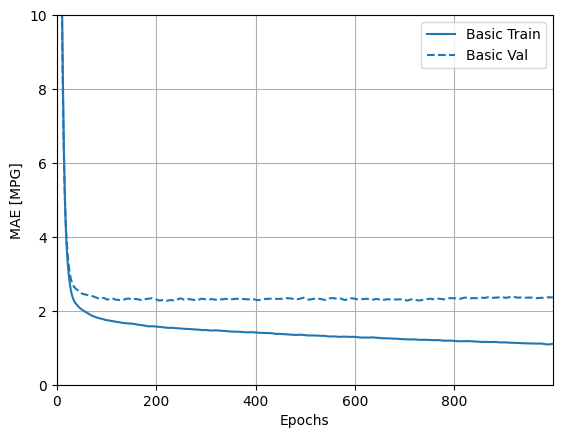

In [19]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std = 2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')   

Text(0, 0.5, 'MSE [MPG^2]')

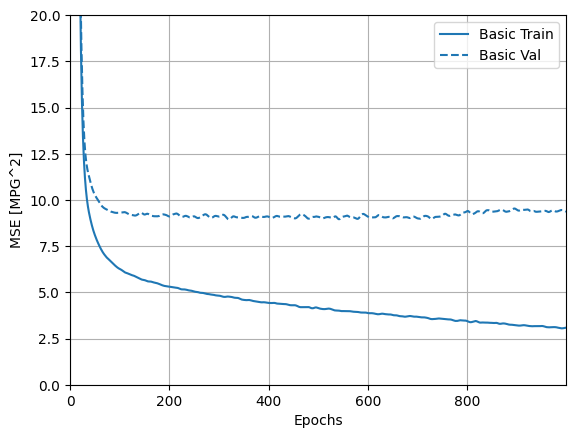

In [50]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')   

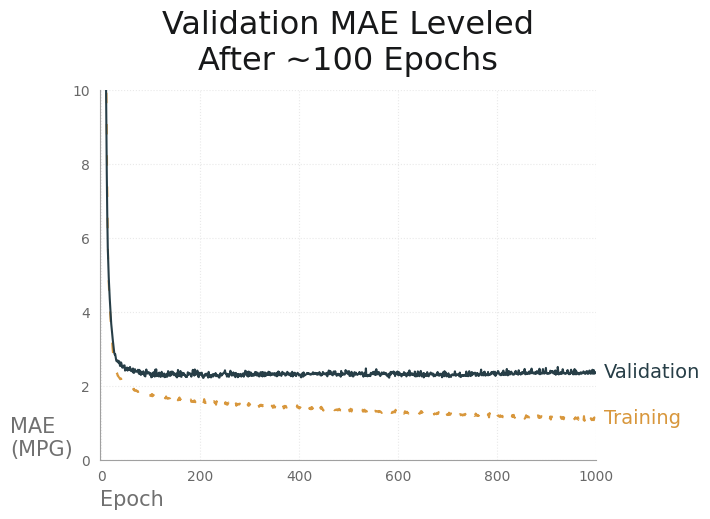

In [49]:
fig, ax = plt.subplots()
plt.grid(which = 'major', axis = 'both', linestyle = ':', color = '#e9e9e9')
plt.plot(hist['epoch'], hist['mae'], color = '#D8973C', linestyle = (0, (5, 10)))
plt.plot(hist['epoch'], hist['val_mae'], color = '#273E47')
ax.set_xlim([-3, 1000])
ax.set_ylim([0, 10])
ax.set_xlabel('Epoch', fontsize = 15, 
			  loc = 'left').set_color('#707070')
ax.set_ylabel('MAE\n(MPG)', fontsize = 15, rotation = 'horizontal',
			  loc = 'bottom', labelpad = 45).set_color('#707070')
ax.set_title('Validation MAE Leveled\nAfter ~100 Epochs', fontsize = 23, pad = 15).set_color('#171819')
for pos in ['right', 'top']:
	plt.gca().spines[pos].set_visible(False)
ax.spines['bottom'].set_color('#A0A0A0')
ax.spines['left'].set_color('#A0A0A0')
ax.tick_params(axis='y', which='both', right=False,
			   left=False, colors = '#686868')
ax.tick_params(axis='x', which='both', top=False,
			   bottom=False, colors = '#686868')

for line, name in zip(ax.lines, ['Training', 'Validation']):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color = line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords = "offset points",
                size = 14, va = "center")

plt.show();

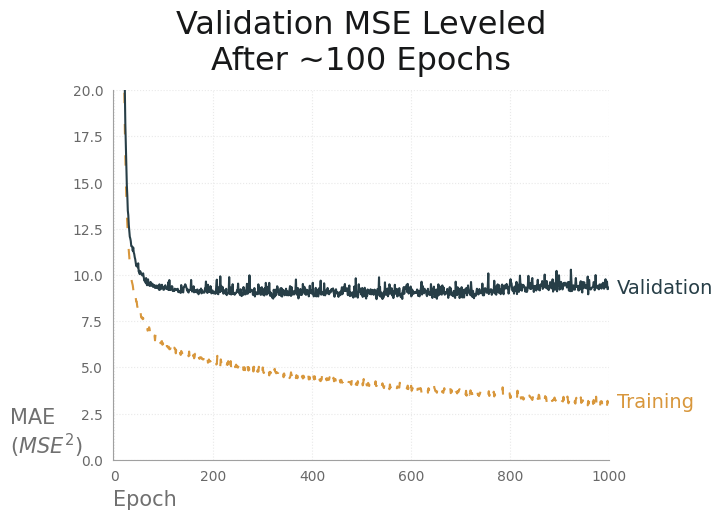

In [52]:
fig, ax = plt.subplots()
plt.grid(which = 'major', axis = 'both', linestyle = ':', color = '#e9e9e9')
plt.plot(hist['epoch'], hist['mse'], color = '#D8973C', linestyle = (0, (5, 10)))
plt.plot(hist['epoch'], hist['val_mse'], color = '#273E47')
ax.set_xlim([-3, 1000])
ax.set_ylim([0, 20])
ax.set_xlabel('Epoch', fontsize = 15, 
			  loc = 'left').set_color('#707070')
ax.set_ylabel('MAE\n($MSE^2$)', fontsize = 15, rotation = 'horizontal',
			  loc = 'bottom', labelpad = 45).set_color('#707070')
ax.set_title('Validation MSE Leveled\nAfter ~100 Epochs', fontsize = 23, pad = 15).set_color('#171819')
for pos in ['right', 'top']:
	plt.gca().spines[pos].set_visible(False)
ax.spines['bottom'].set_color('#A0A0A0')
ax.spines['left'].set_color('#A0A0A0')
ax.tick_params(axis='y', which='both', right=False,
			   left=False, colors = '#686868')
ax.tick_params(axis='x', which='both', top=False,
			   bottom=False, colors = '#686868')

for line, name in zip(ax.lines, ['Training', 'Validation']):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color = line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords = "offset points",
                size = 14, va = "center")

plt.show();

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4308444-ee4b-40c4-b1c5-a2dd284b3779' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>